<a href="https://colab.research.google.com/github/prepcb/Comp1711/blob/main/COMP5930M_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP5930M Scientific Computation - Tutorial 1  \\
Basic implementation of Newton's method to compute $\sqrt{2}$

A basic implementation of Newton's method consists of:

1.   Loop that terminates once one of the two stopping conditions are satisfied.
2.   Evaluation of the function and its derivative.
3.   Newton step to find the next iterate
4.   Output of the final converged value of $x$

In [ ]:
def myNewton(fnon, dfdx, x0, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # dfdx     - name of the derivative function df(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0
    f = eval(fnon)(x,*fnonargs)

    print(' k  xk          f(xk)')

    # Main Newton loop
    while (abs(f) > tol and k < maxk):
        # Evaluate function derivative
        d = eval(dfdx)(x,*fnonargs)

        # Take Newton step
        x = x - f/d
        f = eval(fnon)(x,*fnonargs)
        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, x, abs(f)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

Define the square-root function using different methods.

In [ ]:
def squareRoot(x):
    # Define function f(x) = x^2 - 2
    return (x*x - 2)

In [ ]:
def squareRootR(x,R):
    # Define function f(x) = x^2 - R
    return (x*x - R)

In [ ]:
def dSquareRoot(x):
    # Define function df(x) = 2x
    return (2*x)
def dSquareRootR(x,R):
    # Define function df(x) = 2x
    return (2*x)

Plot the function $f(x) = x^2 - R$:

Text(0, 0.5, 'f(x)')

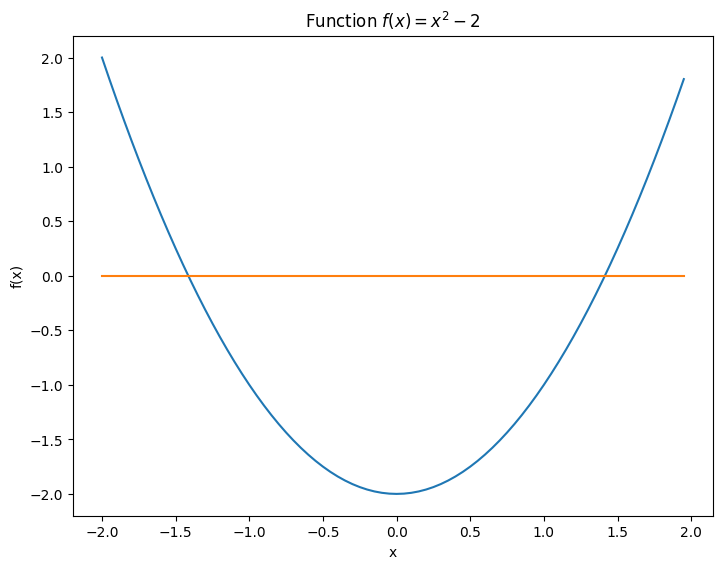

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x=np.arange(-2, 2, 0.05)
y=squareRootR(x,2)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.plot(x,0*y)
ax.set_title('Function $f(x) = x^2 - 2$')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

Call myNewton() to solve for $\sqrt{2}$:

In [ ]:
myNewton('squareRoot', 'dSquareRoot', 1, 1e-6, 100)

 k  xk          f(xk)
 1  1.50000000  2.50e-01
 2  1.41666667  6.94e-03
 3  1.41421569  6.01e-06
 4  1.41421356  4.51e-12
Converged


Note: The number of iterations required depends on the initial guess $x_0$. The closer we are to $x=0$ (where the derivative is zero and the algorithm fails), the more iterations we can except.

In [ ]:
myNewton('squareRootR', 'dSquareRootR', 0.1, 1e-6, 100, 2)

 k  xk          f(xk)
 1  10.05000000  9.90e+01
 2  5.12450249  2.43e+01
 3  2.75739214  5.60e+00
 4  1.74135758  1.03e+00
 5  1.44494338  8.79e-02
 6  1.41454033  9.24e-04
 7  1.41421360  1.07e-07
Converged


To verify the correctness of the solution, we can use SciPy to solve the same problem or use the math.sqrt() function.

---



In [ ]:
import numpy as np
import math
from scipy.optimize import fsolve

root = fsolve(squareRootR, 1, 2)
print(root)

math.sqrt(2)

[1.41421356]


1.4142135623730951